In [19]:
!which -a python

/home/seasun/anaconda3/bin/python
/usr/bin/python


In [51]:
!pip install biopython==1.77

     |████████████████████████████████| 2.3 MB 1.2 MB/s eta 0:00:01
  Attempting uninstall: biopython
    Found existing installation: biopython 1.78
    Uninstalling biopython-1.78:
      Successfully uninstalled biopython-1.78


In [40]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from collections import defaultdict

In [41]:
import random

In [42]:
import pandas as pd
import numpy as np

In [43]:
# read names and postions from narrowPeak file
positions = defaultdict(list)
with open('curax(14h)-Z22-vs-IgG-[FLAG-ZBP1-PLUS].narrowPeak') as f:
    for line in f:
        chrom, start, stop, name, score, strand, signalValue, pValue, qValue, peak = line.split()
        positions[chrom].append((int(start), int(stop), int(score), float(signalValue), float(pValue), float(qValue), int(peak), '14h'))
with open('curax(10h-14h)-Z22-vs-IgG-[FLAG-ZBP1-MINUS].narrowPeak') as f:
    for line in f:
        chrom, start, stop, name, score, strand, signalValue, pValue, qValue, peak = line.split()
        positions[chrom].append((int(start), int(stop), int(score), float(signalValue), float(pValue), float(qValue), int(peak), '10h-14h'))        

In [5]:
# search for short sequences
short_seq_records = []
f = open('train_data.csv', 'w') 
for chrom in positions:
    print(chrom)
    long_seq_record = SeqIO.to_dict(SeqIO.parse(open(chrom + '.fa'), 'fasta'))[chrom]
#     print(long_seq_record)
    for (start, stop, score, signalValue, pValue, qValue, peak, file) in positions[chrom]:
        long_seq = long_seq_record.seq
        alphabet = long_seq.alphabet
        short_seq = str(long_seq)[start-1:stop]
        short_seq_record = SeqRecord(Seq(short_seq, alphabet), id=chrom, description='')
        short_seq_records.append(short_seq_record)
#         print(short_seq)
        with open('train_data.csv', 'a') as f:
            f.write(','.join([chrom, str(score), str(signalValue), str(pValue), str(qValue), str(peak), file, short_seq]))
            f.write('\n')


chr1
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr1_GL456211_random
chr1_GL456221_random
chr2
chr3
chr4
chr5
chr5_GL456354_random
chr6
chr7
chr8
chr9
chrM
chrUn_GL456370
chrUn_GL456383
chrUn_GL456390
chrUn_GL456392
chrUn_GL456393
chrUn_GL456396
chrUn_JH584304
chrX
chrY
chr4_GL456216_random
chr4_JH584293_random
chr4_JH584294_random
chrUn_GL456378
chrUn_GL456389


In [46]:
#generating lengths for negative class  
import numpy as np
from sklearn.neighbors import KernelDensity
X = []
for chrom in positions:
    for (start, stop, score, signalValue, pValue, qValue, peak, file) in positions[chrom]:
        X.append(stop - start + 1)
print(sorted(X))
# Y = np.array(X).reshape(-1, 1)
# kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(Y)
# for i in kde.sample(n_samples=10):
#     print(int(i[0]))
# print(int(kde.sample(n_samples=1)[0])) #sample length

[263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 265, 265, 265, 265, 265, 265, 265, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 269, 269, 269, 269, 269, 269, 269, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 271, 271, 271, 271, 271, 271, 271, 271, 271, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 272, 273, 273, 273, 273, 273, 273, 273, 273, 273, 274, 274, 274, 274, 274, 274, 274, 274, 274, 274, 274, 274, 274, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 276, 276, 276, 276, 276, 276, 276, 276, 276, 276, 276, 277, 277, 277, 277, 277, 277, 277, 278, 278, 278, 278, 278, 278, 278, 279, 279, 279, 279, 279, 279, 279, 279, 279, 279, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 281, 281, 281, 281, 281, 281, 282, 282,

In [46]:
positions_neg = defaultdict(list)
for chrom in positions:
    long_seq_record = SeqIO.to_dict(SeqIO.parse(open(chrom + '.fa'), 'fasta'))[chrom]
    print(chrom)
    for i in range(len(long_seq_record.seq)//10000):
        begin = random.randint(0,len(long_seq_record.seq))
        length = int(kde.sample(n_samples=1)[0]) #sample length
        end = begin + length - 1
        if end > len(long_seq_record.seq):
            continue
        for (start, stop, score, signalValue, pValue, qValue, peak, file) in positions[chrom]:
            if ((begin >= start and end <= stop) 
            or (begin < start and end >= start and end <= stop) 
            or (begin >= start and begin <= stop and end > stop)):
                continue
        if i > 350:
            continue
        positions_neg[chrom].append((begin, end))

chr1
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr1_GL456211_random
chr1_GL456221_random
chr2
chr3
chr4
chr5
chr5_GL456354_random
chr6
chr7
chr8
chr9
chrM
chrUn_GL456370
chrUn_GL456383
chrUn_GL456390
chrUn_GL456392
chrUn_GL456393
chrUn_GL456396
chrUn_JH584304
chrX
chrY
chr4_GL456216_random
chr4_JH584293_random
chr4_JH584294_random
chrUn_GL456378
chrUn_GL456389


In [42]:
for chrom in positions:
    print(len(positions[chrom])) #distribution check

186
242
233
166
193
188
247
168
268
124
216
1
2
346
222
334
336
1
256
275
320
203
3
2
17
10
7
6
8
40
227
51
1
1
2
1
6


In [47]:
for chrom in positions_neg:
    print(len(positions_neg[chrom])) #distribution check

351
351
351
351
351
351
351
351
351
351
351
24
20
351
351
351
351
19
351
351
351
351
1
2
3
2
2
5
2
11
351
351
6
20
19
3
2


In [44]:
short_seq_records = []

f = open('train_data_neg.csv', 'w') 
for chrom in positions:
    print(chrom)
    long_seq_record = SeqIO.to_dict(SeqIO.parse(open(chrom + '.fa'), 'fasta'))[chrom]
    for (begin, end) in positions_neg[chrom]:
        long_seq = long_seq_record.seq
        alphabet = long_seq.alphabet
        short_seq = str(long_seq)[begin-1:end]
        short_seq_record = SeqRecord(Seq(short_seq, alphabet), id=chrom, description='')
        short_seq_records.append(short_seq_record)

#         print(short_seq)
        
        with open('train_data_neg.csv', 'a') as f:
            f.write(chrom + ',' + short_seq + '\n')

chr1
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr1_GL456211_random
chr1_GL456221_random
chr2
chr3
chr4
chr5
chr5_GL456354_random
chr6
chr7
chr8
chr9
chrM
chrUn_GL456370
chrUn_GL456383
chrUn_GL456390
chrUn_GL456392
chrUn_GL456393
chrUn_GL456396
chrUn_JH584304
chrX
chrY
chr4_GL456216_random
chr4_JH584293_random
chr4_JH584294_random
chrUn_GL456378
chrUn_GL456389


In [293]:
file1 = open("train_data.csv")
df_pos = pd.read_csv('train_data.csv', delimiter=',',
                names=['chrom', 'score', 'signalValue', 'pValue', 'qValue', 'peak', 'file', 'short_seq'])
file2 = open("train_data_neg.csv")
df_neg = pd.read_csv('train_data_neg.csv', delimiter=',',
                names=['chrom', 'short_seq'])

In [294]:
df_pos['target'] = 1
df_neg['target'] = 0

df_posit = df_pos.drop(['chrom', 'score', 'signalValue', 'pValue', 'qValue', 'peak', 'file'], axis='columns')
df_negat = df_neg.drop(['chrom'], axis='columns')

X = pd.concat([df_posit, df_negat])
filtered_X = X[X['short_seq'].notnull()]

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
# enc = OneHotEncoder()
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(filtered_X)
len(enc.categories_[0])

270621

In [6]:
from dna2vec.dna2vec.multi_k_model import MultiKModel

In [122]:
filepath = 'dna2vec/pretrained/dna2vec-20161219-0153-k3to8-100d-10c-29320Mbp-sliding-Xat.w2v'
mk_model = MultiKModel(filepath)
mk_model.vector('AAA')

array([ 0.023137,  0.156295, -0.247631, -0.334389, -0.192204,  0.041053,
       -0.206709, -0.058753, -0.00343 , -0.371543,  0.22161 ,  0.192632,
        0.139376,  0.227176,  0.155875,  0.077491, -0.256322, -0.332782,
       -0.113679,  0.22403 , -0.044831, -0.184227, -0.288251, -0.041761,
       -0.114018, -0.15135 , -0.182786, -0.117931,  0.286294, -0.112629,
       -0.012661, -0.094454,  0.103956, -0.235743, -0.266493, -0.04168 ,
       -0.014619, -0.481348, -0.206115,  0.139335,  0.091203, -0.377512,
       -0.078036, -0.373412, -0.132369, -0.190614, -0.308002, -0.365701,
       -0.327944, -0.166004, -0.162306, -0.087187, -0.253729, -0.066742,
       -0.100518,  0.161993,  0.153988, -0.349804, -0.30423 ,  0.013614,
        0.302106,  0.222722,  0.064441,  0.060697,  0.026015, -0.093327,
       -0.180128, -0.142379, -0.102415,  0.12586 , -0.507178, -0.19879 ,
        0.098929,  0.116615, -0.018012, -0.130283,  0.016617,  0.105993,
       -0.345523, -0.096997, -0.208423,  0.008292, 

In [54]:
!python3.6 ./dna2vec/train_dna2vec.py -c ./dna2vec/configs/small_example.yml

Namespace(c='./dna2vec/configs/small_example.yml', context=4, debug=True, epochs=3, gensim_iters=1, inputs=['dna2vec/example_inputs/chrUn_KI27075*.fa'], k_high=5, k_low=3, kmer_fragmenter='sliding', out_dir='../dataset/dna2vec/results', rseed=7, rseed_trainset=123, vec_dim=12)
[2021-05-05 13:21:29.284159] INFO: Generic: ./dna2vec/train_dna2vec.py -c ./dna2vec/configs/small_example.yml
[2021-05-05 13:21:29.284289] INFO: Generic: kmer fragmenter: sliding
[2021-05-05 13:21:29.284364] INFO: SeqGenerator: Number of epochs: 3
[2021-05-05 13:21:29.284426] INFO: Learner: word2vec.FAST_VERSION (should be >= 0): 1
[2021-05-05 13:21:29.284474] INFO: Learner: Context window half size: 4
[2021-05-05 13:21:29.284518] INFO: Learner: Use skipgram: 1
[2021-05-05 13:21:29.284559] INFO: Learner: gensim_iters: 1
[2021-05-05 13:21:29.284598] INFO: Learner: vec_dim: 12
[2021-05-05 13:21:29.284994] INFO: gensim.models.word2vec: collecting all words and their counts
[2021-05-05 13:21:29.285098] INFO: SeqGener

[2021-05-05 13:21:29.829102] DEBUG: SeqGenerator: input seq len: 2526
[2021-05-05 13:21:29.829396] DEBUG: KmerSeqIterable: Splits of len=2526 to: [2526]
[2021-05-05 13:21:29.839026] DEBUG: SeqGenerator: input seq len: 4564
[2021-05-05 13:21:29.839436] DEBUG: KmerSeqIterable: Splits of len=4564 to: [4564]
[2021-05-05 13:21:29.856864] DEBUG: SeqGenerator: input seq len: 3278
[2021-05-05 13:21:29.857233] DEBUG: KmerSeqIterable: Splits of len=3278 to: [3278]
[2021-05-05 13:21:29.869612] DEBUG: SeqGenerator: input seq len: 3821
[2021-05-05 13:21:29.869942] DEBUG: KmerSeqIterable: Splits of len=3821 to: [3821]
[2021-05-05 13:21:29.884330] DEBUG: SeqGenerator: input seq len: 521
[2021-05-05 13:21:29.884549] DEBUG: KmerSeqIterable: Splits of len=521 to: [521]
[2021-05-05 13:21:29.886857] INFO: SeqGenerator: Opened file: dna2vec/example_inputs/chrUn_KI270754v1.fa
[2021-05-05 13:21:29.887004] INFO: SeqGenerator: Memory usage: 0.2039 MB
[2021-05-05 13:21:29.887095] INFO: SeqGenerator: Current epo

[2021-05-05 13:21:30.330389] DEBUG: KmerSeqIterable: Splits of len=4984 to: [4984]
[2021-05-05 13:21:30.342219] DEBUG: SeqGenerator: input seq len: 4576
[2021-05-05 13:21:30.342487] DEBUG: KmerSeqIterable: Splits of len=4576 to: [4576]
[2021-05-05 13:21:30.360535] DEBUG: SeqGenerator: input seq len: 4187
[2021-05-05 13:21:30.360790] DEBUG: KmerSeqIterable: Splits of len=4187 to: [4187]
[2021-05-05 13:21:30.370979] DEBUG: SeqGenerator: input seq len: 3486
[2021-05-05 13:21:30.371188] DEBUG: KmerSeqIterable: Splits of len=3486 to: [3486]
[2021-05-05 13:21:30.378209] DEBUG: SeqGenerator: input seq len: 3816
[2021-05-05 13:21:30.378401] DEBUG: KmerSeqIterable: Splits of len=3816 to: [3816]
[2021-05-05 13:21:30.387657] DEBUG: SeqGenerator: input seq len: 3080
[2021-05-05 13:21:30.387876] DEBUG: KmerSeqIterable: Splits of len=3080 to: [3080]
[2021-05-05 13:21:30.396344] DEBUG: SeqGenerator: input seq len: 2858
[2021-05-05 13:21:30.396663] DEBUG: KmerSeqIterable: Splits of len=2858 to: [2858]

[2021-05-05 13:21:30.841757] DEBUG: SeqGenerator: input seq len: 3653
[2021-05-05 13:21:30.842155] DEBUG: KmerSeqIterable: Splits of len=3653 to: [3653]
[2021-05-05 13:21:30.853366] DEBUG: SeqGenerator: input seq len: 3399
[2021-05-05 13:21:30.853632] DEBUG: KmerSeqIterable: Splits of len=3399 to: [3399]
[2021-05-05 13:21:30.864201] DEBUG: SeqGenerator: input seq len: 3080
[2021-05-05 13:21:30.864599] DEBUG: KmerSeqIterable: Splits of len=3080 to: [3080]
[2021-05-05 13:21:30.877776] DEBUG: SeqGenerator: input seq len: 4684
[2021-05-05 13:21:30.878055] DEBUG: KmerSeqIterable: Splits of len=4684 to: [4684]
[2021-05-05 13:21:30.888125] DEBUG: SeqGenerator: input seq len: 3609
[2021-05-05 13:21:30.888373] DEBUG: KmerSeqIterable: Splits of len=3609 to: [3609]
[2021-05-05 13:21:30.900086] DEBUG: SeqGenerator: input seq len: 3790
[2021-05-05 13:21:30.900347] DEBUG: KmerSeqIterable: Splits of len=3790 to: [3790]
[2021-05-05 13:21:30.908639] DEBUG: SeqGenerator: input seq len: 3834
[2021-05-05 

[2021-05-05 13:21:31.423475] INFO: SeqGenerator: Opened file: dna2vec/example_inputs/chrUn_KI270756v1.fa
[2021-05-05 13:21:31.423653] INFO: SeqGenerator: Memory usage: 0.2039 MB
[2021-05-05 13:21:31.423749] INFO: SeqGenerator: Current epoch: 2 / 3
[2021-05-05 13:21:31.425206] INFO: SeqGenerator: Whole fasta seqlen: 79590
[2021-05-05 13:21:31.425358] DEBUG: SeqGenerator: input seq len: 2697
[2021-05-05 13:21:31.425548] DEBUG: KmerSeqIterable: Splits of len=2697 to: [2697]
[2021-05-05 13:21:31.431786] DEBUG: SeqGenerator: input seq len: 4336
[2021-05-05 13:21:31.432034] DEBUG: KmerSeqIterable: Splits of len=4336 to: [4336]
[2021-05-05 13:21:31.442962] DEBUG: SeqGenerator: input seq len: 4983
[2021-05-05 13:21:31.443377] DEBUG: KmerSeqIterable: Splits of len=4983 to: [4250, 667]
[2021-05-05 13:21:31.453530] DEBUG: SeqGenerator: input seq len: 3432
[2021-05-05 13:21:31.453729] DEBUG: KmerSeqIterable: Splits of len=3432 to: [3432]
[2021-05-05 13:21:31.462523] DEBUG: SeqGenerator: input seq 

[2021-05-05 13:21:31.879383] DEBUG: SeqGenerator: input seq len: 2775
[2021-05-05 13:21:31.879763] DEBUG: KmerSeqIterable: Splits of len=2775 to: [2775]
[2021-05-05 13:21:31.886712] DEBUG: SeqGenerator: input seq len: 4150
[2021-05-05 13:21:31.887161] DEBUG: KmerSeqIterable: Splits of len=4150 to: [4150]
[2021-05-05 13:21:31.898859] DEBUG: SeqGenerator: input seq len: 3003
[2021-05-05 13:21:31.899298] DEBUG: KmerSeqIterable: Splits of len=3003 to: [3003]
[2021-05-05 13:21:31.912654] DEBUG: SeqGenerator: input seq len: 1566
[2021-05-05 13:21:31.912986] DEBUG: KmerSeqIterable: Splits of len=1566 to: [1566]
[2021-05-05 13:21:31.920533] INFO: SeqGenerator: Opened file: dna2vec/example_inputs/chrUn_KI270751v1.fa
[2021-05-05 13:21:31.920716] INFO: SeqGenerator: Memory usage: 0.2039 MB
[2021-05-05 13:21:31.920809] INFO: SeqGenerator: Current epoch: 2 / 3
[2021-05-05 13:21:31.923411] INFO: SeqGenerator: Whole fasta seqlen: 150742
[2021-05-05 13:21:31.923628] DEBUG: SeqGenerator: input seq len:

[2021-05-05 13:21:32.479956] DEBUG: SeqGenerator: input seq len: 3605
[2021-05-05 13:21:32.480397] DEBUG: KmerSeqIterable: Splits of len=3605 to: [3605]
[2021-05-05 13:21:32.498328] DEBUG: SeqGenerator: input seq len: 4637
[2021-05-05 13:21:32.498768] DEBUG: KmerSeqIterable: Splits of len=4637 to: [4637]
[2021-05-05 13:21:32.522588] DEBUG: SeqGenerator: input seq len: 2801
[2021-05-05 13:21:32.522833] DEBUG: KmerSeqIterable: Splits of len=2801 to: [2801]
[2021-05-05 13:21:32.531106] DEBUG: SeqGenerator: input seq len: 3603
[2021-05-05 13:21:32.531492] DEBUG: KmerSeqIterable: Splits of len=3603 to: [3603]
[2021-05-05 13:21:32.542329] DEBUG: SeqGenerator: input seq len: 4039
[2021-05-05 13:21:32.542741] DEBUG: KmerSeqIterable: Splits of len=4039 to: [4039]
[2021-05-05 13:21:32.560655] DEBUG: SeqGenerator: input seq len: 4130
[2021-05-05 13:21:32.561097] DEBUG: KmerSeqIterable: Splits of len=4130 to: [4130]
[2021-05-05 13:21:32.584770] DEBUG: SeqGenerator: input seq len: 2784
[2021-05-05 

[2021-05-05 13:21:33.311709] DEBUG: SeqGenerator: input seq len: 4407
[2021-05-05 13:21:33.312115] DEBUG: KmerSeqIterable: Splits of len=4407 to: [4407]
[2021-05-05 13:21:33.329564] DEBUG: SeqGenerator: input seq len: 3912
[2021-05-05 13:21:33.329906] DEBUG: KmerSeqIterable: Splits of len=3912 to: [3912]
[2021-05-05 13:21:33.344587] DEBUG: SeqGenerator: input seq len: 2900
[2021-05-05 13:21:33.344885] DEBUG: KmerSeqIterable: Splits of len=2900 to: [2900]
[2021-05-05 13:21:33.355271] DEBUG: SeqGenerator: input seq len: 3502
[2021-05-05 13:21:33.355567] DEBUG: KmerSeqIterable: Splits of len=3502 to: [3502]
[2021-05-05 13:21:33.368095] INFO: SeqGenerator: Opened file: dna2vec/example_inputs/chrUn_KI270752v1.fa
[2021-05-05 13:21:33.368244] INFO: SeqGenerator: Memory usage: 0.2039 MB
[2021-05-05 13:21:33.368338] INFO: SeqGenerator: Current epoch: 3 / 3
[2021-05-05 13:21:33.368940] INFO: SeqGenerator: Whole fasta seqlen: 27745
[2021-05-05 13:21:33.369055] DEBUG: SeqGenerator: input seq len: 

[2021-05-05 13:21:33.973644] DEBUG: SeqGenerator: input seq len: 3177
[2021-05-05 13:21:33.973895] DEBUG: KmerSeqIterable: Splits of len=3177 to: [2668]
[2021-05-05 13:21:33.979940] DEBUG: SeqGenerator: input seq len: 4510
[2021-05-05 13:21:33.980201] DEBUG: KmerSeqIterable: Splits of len=4510 to: [974]
[2021-05-05 13:21:33.982365] DEBUG: SeqGenerator: input seq len: 4660
[2021-05-05 13:21:33.982577] DEBUG: KmerSeqIterable: Splits of len=4660 to: [1551]
[2021-05-05 13:21:33.985988] DEBUG: SeqGenerator: input seq len: 4671
[2021-05-05 13:21:33.986415] DEBUG: KmerSeqIterable: Splits of len=4671 to: [4564]
[2021-05-05 13:21:34.001876] DEBUG: SeqGenerator: input seq len: 3845
[2021-05-05 13:21:34.002174] DEBUG: KmerSeqIterable: Splits of len=3845 to: [3845]
[2021-05-05 13:21:34.014437] DEBUG: SeqGenerator: input seq len: 3787
[2021-05-05 13:21:34.014718] DEBUG: KmerSeqIterable: Splits of len=3787 to: [3787]
[2021-05-05 13:21:34.029732] DEBUG: SeqGenerator: input seq len: 4184
[2021-05-05 1

[2021-05-05 13:21:34.481946] DEBUG: SeqGenerator: input seq len: 4865
[2021-05-05 13:21:34.482231] DEBUG: KmerSeqIterable: Splits of len=4865 to: [4865]
[2021-05-05 13:21:34.492388] DEBUG: SeqGenerator: input seq len: 4297
[2021-05-05 13:21:34.492805] DEBUG: KmerSeqIterable: Splits of len=4297 to: [4297]
[2021-05-05 13:21:34.510151] DEBUG: SeqGenerator: input seq len: 710
[2021-05-05 13:21:34.510330] DEBUG: KmerSeqIterable: Splits of len=710 to: [710]
[2021-05-05 13:21:34.511991] INFO: SeqGenerator: Opened file: dna2vec/example_inputs/chrUn_KI270750v1.fa
[2021-05-05 13:21:34.512082] INFO: SeqGenerator: Memory usage: 0.2039 MB
[2021-05-05 13:21:34.512140] INFO: SeqGenerator: Current epoch: 3 / 3
[2021-05-05 13:21:34.514478] INFO: SeqGenerator: Whole fasta seqlen: 148850
[2021-05-05 13:21:34.514665] DEBUG: SeqGenerator: input seq len: 3218
[2021-05-05 13:21:34.514938] DEBUG: KmerSeqIterable: Splits of len=3218 to: [3218]
[2021-05-05 13:21:34.523370] DEBUG: SeqGenerator: input seq len: 38

[2021-05-05 13:21:35.140872] INFO: gensim.models.word2vec: min_count=5 retains 1344 unique words (drops 0)
[2021-05-05 13:21:35.141006] INFO: gensim.models.word2vec: min_count leaves 1823666 word corpus (100% of original 1823666)
[2021-05-05 13:21:35.146715] INFO: gensim.models.word2vec: deleting the raw counts dictionary of 1344 items
[2021-05-05 13:21:35.146915] INFO: gensim.models.word2vec: sample=0.001 downsamples 75 most-common words
[2021-05-05 13:21:35.147045] INFO: gensim.models.word2vec: downsampling leaves estimated 1558062 word corpus (85.4% of prior 1823666)
[2021-05-05 13:21:35.147172] INFO: gensim.models.word2vec: estimated required memory for 1344 words and 12 dimensions: 801024 bytes
[2021-05-05 13:21:35.149697] INFO: gensim.models.word2vec: resetting layer weights
[2021-05-05 13:21:35.161861] INFO: gensim.models.word2vec: training model with 4 workers on 1344 vocabulary and 12 features, using sg=1 hs=0 sample=0.001 negative=5
[2021-05-05 13:21:35.162037] INFO: gensim.m

[2021-05-05 13:21:35.604524] DEBUG: SeqGenerator: input seq len: 2865
[2021-05-05 13:21:35.605015] DEBUG: KmerSeqIterable: Splits of len=2865 to: [2865]
[2021-05-05 13:21:35.610927] DEBUG: SeqGenerator: input seq len: 3307
[2021-05-05 13:21:35.611371] DEBUG: KmerSeqIterable: Splits of len=3307 to: [3307]
[2021-05-05 13:21:35.625798] DEBUG: gensim.models.word2vec: queueing job #14 (9708 words, 3 sentences) at alpha 0.02339
[2021-05-05 13:21:35.626068] DEBUG: SeqGenerator: input seq len: 3777
[2021-05-05 13:21:35.626411] DEBUG: KmerSeqIterable: Splits of len=3777 to: [3777]
[2021-05-05 13:21:35.643065] DEBUG: SeqGenerator: input seq len: 3401
[2021-05-05 13:21:35.643421] DEBUG: KmerSeqIterable: Splits of len=3401 to: [3401]
[2021-05-05 13:21:35.654375] DEBUG: gensim.models.word2vec: queueing job #15 (7076 words, 2 sentences) at alpha 0.02325
[2021-05-05 13:21:35.654613] DEBUG: SeqGenerator: input seq len: 3159
[2021-05-05 13:21:35.661015] DEBUG: KmerSeqIterable: Splits of len=3159 to: [3

[2021-05-05 13:21:36.114706] DEBUG: gensim.models.word2vec: queueing job #28 (7437 words, 2 sentences) at alpha 0.02159
[2021-05-05 13:21:36.114959] DEBUG: SeqGenerator: input seq len: 4320
[2021-05-05 13:21:36.118532] DEBUG: KmerSeqIterable: Splits of len=4320 to: [2834]
[2021-05-05 13:21:36.126623] DEBUG: SeqGenerator: input seq len: 2659
[2021-05-05 13:21:36.133823] DEBUG: KmerSeqIterable: Splits of len=2659 to: [2006]
[2021-05-05 13:21:36.147826] DEBUG: SeqGenerator: input seq len: 4012
[2021-05-05 13:21:36.148241] DEBUG: KmerSeqIterable: Splits of len=4012 to: [4012]
[2021-05-05 13:21:36.171482] DEBUG: gensim.models.word2vec: queueing job #29 (7887 words, 3 sentences) at alpha 0.02149
[2021-05-05 13:21:36.171804] DEBUG: SeqGenerator: input seq len: 4113
[2021-05-05 13:21:36.172420] DEBUG: KmerSeqIterable: Splits of len=4113 to: [4113]
[2021-05-05 13:21:36.189917] INFO: gensim.models.word2vec: PROGRESS: at 14.09% examples, 199703 words/s, in_qsize 0, out_qsize 0
[2021-05-05 13:21:3

[2021-05-05 13:21:36.798542] DEBUG: SeqGenerator: input seq len: 4539
[2021-05-05 13:21:36.801685] DEBUG: KmerSeqIterable: Splits of len=4539 to: [4539]
[2021-05-05 13:21:36.814347] DEBUG: gensim.models.word2vec: queueing job #46 (9375 words, 2 sentences) at alpha 0.01954
[2021-05-05 13:21:36.814557] DEBUG: SeqGenerator: input seq len: 4045
[2021-05-05 13:21:36.816961] DEBUG: KmerSeqIterable: Splits of len=4045 to: [4045]
[2021-05-05 13:21:36.831212] DEBUG: SeqGenerator: input seq len: 4854
[2021-05-05 13:21:36.831684] DEBUG: KmerSeqIterable: Splits of len=4854 to: [4854]
[2021-05-05 13:21:36.842380] DEBUG: gensim.models.word2vec: queueing job #47 (8576 words, 2 sentences) at alpha 0.01945
[2021-05-05 13:21:36.842630] DEBUG: SeqGenerator: input seq len: 4439
[2021-05-05 13:21:36.849870] DEBUG: KmerSeqIterable: Splits of len=4439 to: [4439]
[2021-05-05 13:21:36.861758] DEBUG: SeqGenerator: input seq len: 3182
[2021-05-05 13:21:36.862731] DEBUG: KmerSeqIterable: Splits of len=3182 to: [3

[2021-05-05 13:21:37.394157] DEBUG: SeqGenerator: input seq len: 3790
[2021-05-05 13:21:37.399043] DEBUG: KmerSeqIterable: Splits of len=3790 to: [3790]
[2021-05-05 13:21:37.419029] DEBUG: SeqGenerator: input seq len: 3834
[2021-05-05 13:21:37.419695] DEBUG: KmerSeqIterable: Splits of len=3834 to: [3834]
[2021-05-05 13:21:37.433440] DEBUG: gensim.models.word2vec: queueing job #64 (7391 words, 2 sentences) at alpha 0.01750
[2021-05-05 13:21:37.433650] DEBUG: SeqGenerator: input seq len: 3115
[2021-05-05 13:21:37.437175] DEBUG: KmerSeqIterable: Splits of len=3115 to: [3115]
[2021-05-05 13:21:37.448321] DEBUG: SeqGenerator: input seq len: 3761
[2021-05-05 13:21:37.448816] DEBUG: KmerSeqIterable: Splits of len=3761 to: [3761]
[2021-05-05 13:21:37.460978] DEBUG: gensim.models.word2vec: queueing job #65 (6941 words, 2 sentences) at alpha 0.01740
[2021-05-05 13:21:37.461288] DEBUG: SeqGenerator: input seq len: 2762
[2021-05-05 13:21:37.461832] DEBUG: KmerSeqIterable: Splits of len=2762 to: [2

[2021-05-05 13:21:38.117401] DEBUG: gensim.models.word2vec: queueing job #81 (8119 words, 2 sentences) at alpha 0.01564
[2021-05-05 13:21:38.117598] DEBUG: SeqGenerator: input seq len: 4691
[2021-05-05 13:21:38.128644] DEBUG: KmerSeqIterable: Splits of len=4691 to: [4691]
[2021-05-05 13:21:38.141616] DEBUG: SeqGenerator: input seq len: 3826
[2021-05-05 13:21:38.141937] DEBUG: KmerSeqIterable: Splits of len=3826 to: [3826]
[2021-05-05 13:21:38.152812] DEBUG: gensim.models.word2vec: queueing job #82 (8197 words, 2 sentences) at alpha 0.01555
[2021-05-05 13:21:38.153033] DEBUG: SeqGenerator: input seq len: 4741
[2021-05-05 13:21:38.156579] DEBUG: KmerSeqIterable: Splits of len=4741 to: [4741]
[2021-05-05 13:21:38.175959] INFO: SeqGenerator: Opened file: dna2vec/example_inputs/chrUn_KI270756v1.fa
[2021-05-05 13:21:38.176170] INFO: SeqGenerator: Memory usage: 0.2039 MB
[2021-05-05 13:21:38.176481] INFO: SeqGenerator: Current epoch: 2 / 3
[2021-05-05 13:21:38.178100] INFO: SeqGenerator: Whol

[2021-05-05 13:21:38.680620] DEBUG: gensim.models.word2vec: queueing job #98 (7513 words, 3 sentences) at alpha 0.01384
[2021-05-05 13:21:38.680877] DEBUG: SeqGenerator: input seq len: 3106
[2021-05-05 13:21:38.693595] DEBUG: KmerSeqIterable: Splits of len=3106 to: [3106]
[2021-05-05 13:21:38.706233] DEBUG: SeqGenerator: input seq len: 3235
[2021-05-05 13:21:38.706625] DEBUG: KmerSeqIterable: Splits of len=3235 to: [3235]
[2021-05-05 13:21:38.726861] DEBUG: SeqGenerator: input seq len: 3710
[2021-05-05 13:21:38.727503] DEBUG: KmerSeqIterable: Splits of len=3710 to: [1317]
[2021-05-05 13:21:38.733281] DEBUG: gensim.models.word2vec: queueing job #99 (8890 words, 3 sentences) at alpha 0.01370
[2021-05-05 13:21:38.733801] DEBUG: SeqGenerator: input seq len: 3600
[2021-05-05 13:21:38.744612] DEBUG: KmerSeqIterable: Splits of len=3600 to: [1948]
[2021-05-05 13:21:38.750599] DEBUG: SeqGenerator: input seq len: 2758
[2021-05-05 13:21:38.751019] DEBUG: KmerSeqIterable: Splits of len=2758 to: [5

[2021-05-05 13:21:39.297884] DEBUG: SeqGenerator: input seq len: 2696
[2021-05-05 13:21:39.298331] DEBUG: KmerSeqIterable: Splits of len=2696 to: [2696]
[2021-05-05 13:21:39.306283] DEBUG: gensim.models.word2vec: queueing job #115 (9991 words, 3 sentences) at alpha 0.01184
[2021-05-05 13:21:39.306492] DEBUG: SeqGenerator: input seq len: 3773
[2021-05-05 13:21:39.309660] DEBUG: KmerSeqIterable: Splits of len=3773 to: [3773]
[2021-05-05 13:21:39.322905] DEBUG: SeqGenerator: input seq len: 4809
[2021-05-05 13:21:39.323494] DEBUG: KmerSeqIterable: Splits of len=4809 to: [4809]
[2021-05-05 13:21:39.345065] DEBUG: gensim.models.word2vec: queueing job #116 (6461 words, 2 sentences) at alpha 0.01170
[2021-05-05 13:21:39.345379] DEBUG: SeqGenerator: input seq len: 4890
[2021-05-05 13:21:39.345776] DEBUG: KmerSeqIterable: Splits of len=4890 to: [4890]
[2021-05-05 13:21:39.370456] DEBUG: SeqGenerator: input seq len: 2611
[2021-05-05 13:21:39.370731] DEBUG: KmerSeqIterable: Splits of len=2611 to: 

[2021-05-05 13:21:39.921027] DEBUG: SeqGenerator: input seq len: 2976
[2021-05-05 13:21:39.921563] DEBUG: KmerSeqIterable: Splits of len=2976 to: [2976]
[2021-05-05 13:21:39.930873] DEBUG: gensim.models.word2vec: queueing job #134 (9111 words, 2 sentences) at alpha 0.00985
[2021-05-05 13:21:39.931099] DEBUG: SeqGenerator: input seq len: 3628
[2021-05-05 13:21:39.933417] DEBUG: KmerSeqIterable: Splits of len=3628 to: [3628]
[2021-05-05 13:21:39.946140] DEBUG: SeqGenerator: input seq len: 3476
[2021-05-05 13:21:39.946461] DEBUG: KmerSeqIterable: Splits of len=3476 to: [3476]
[2021-05-05 13:21:39.952195] DEBUG: gensim.models.word2vec: queueing job #135 (6596 words, 2 sentences) at alpha 0.00975
[2021-05-05 13:21:39.952366] DEBUG: SeqGenerator: input seq len: 2692
[2021-05-05 13:21:39.958040] DEBUG: KmerSeqIterable: Splits of len=2692 to: [2692]
[2021-05-05 13:21:39.977980] DEBUG: SeqGenerator: input seq len: 3497
[2021-05-05 13:21:39.978415] DEBUG: KmerSeqIterable: Splits of len=3497 to: 

[2021-05-05 13:21:40.623120] DEBUG: gensim.models.word2vec: queueing job #150 (7567 words, 2 sentences) at alpha 0.00814
[2021-05-05 13:21:40.623323] DEBUG: SeqGenerator: input seq len: 3670
[2021-05-05 13:21:40.627194] DEBUG: KmerSeqIterable: Splits of len=3670 to: [3670]
[2021-05-05 13:21:40.649998] DEBUG: SeqGenerator: input seq len: 3856
[2021-05-05 13:21:40.650511] DEBUG: KmerSeqIterable: Splits of len=3856 to: [3856]
[2021-05-05 13:21:40.663090] DEBUG: gensim.models.word2vec: queueing job #151 (7702 words, 2 sentences) at alpha 0.00804
[2021-05-05 13:21:40.663727] DEBUG: SeqGenerator: input seq len: 4800
[2021-05-05 13:21:40.674133] DEBUG: KmerSeqIterable: Splits of len=4800 to: [4800]
[2021-05-05 13:21:40.703546] DEBUG: SeqGenerator: input seq len: 2632
[2021-05-05 13:21:40.704056] DEBUG: KmerSeqIterable: Splits of len=2632 to: [2632]
[2021-05-05 13:21:40.719851] DEBUG: gensim.models.word2vec: queueing job #152 (8648 words, 2 sentences) at alpha 0.00795
[2021-05-05 13:21:40.7201

[2021-05-05 13:21:41.236323] DEBUG: KmerSeqIterable: Splits of len=3628 to: [3628]
[2021-05-05 13:21:41.247428] INFO: SeqGenerator: Opened file: dna2vec/example_inputs/chrUn_KI270754v1.fa
[2021-05-05 13:21:41.247590] INFO: SeqGenerator: Memory usage: 0.2039 MB
[2021-05-05 13:21:41.247667] INFO: SeqGenerator: Current epoch: 3 / 3
[2021-05-05 13:21:41.248457] INFO: SeqGenerator: Whole fasta seqlen: 40191
[2021-05-05 13:21:41.248582] DEBUG: SeqGenerator: input seq len: 3049
[2021-05-05 13:21:41.248815] DEBUG: KmerSeqIterable: Splits of len=3049 to: [3049]
[2021-05-05 13:21:41.257484] DEBUG: gensim.models.word2vec: queueing job #167 (9870 words, 3 sentences) at alpha 0.00614
[2021-05-05 13:21:41.257698] DEBUG: SeqGenerator: input seq len: 3628
[2021-05-05 13:21:41.265897] DEBUG: KmerSeqIterable: Splits of len=3628 to: [3628]
[2021-05-05 13:21:41.280927] DEBUG: SeqGenerator: input seq len: 4448
[2021-05-05 13:21:41.281711] DEBUG: KmerSeqIterable: Splits of len=4448 to: [4448]
[2021-05-05 13

[2021-05-05 13:21:41.757184] DEBUG: SeqGenerator: input seq len: 2871
[2021-05-05 13:21:41.757480] DEBUG: KmerSeqIterable: Splits of len=2871 to: [2871]
[2021-05-05 13:21:41.767642] DEBUG: gensim.models.word2vec: queueing job #182 (7810 words, 2 sentences) at alpha 0.00444
[2021-05-05 13:21:41.767872] DEBUG: SeqGenerator: input seq len: 4557
[2021-05-05 13:21:41.784310] DEBUG: KmerSeqIterable: Splits of len=4557 to: [4557]
[2021-05-05 13:21:41.796863] DEBUG: SeqGenerator: input seq len: 2995
[2021-05-05 13:21:41.797175] DEBUG: KmerSeqIterable: Splits of len=2995 to: [2995]
[2021-05-05 13:21:41.808294] DEBUG: gensim.models.word2vec: queueing job #183 (7420 words, 2 sentences) at alpha 0.00434
[2021-05-05 13:21:41.808617] DEBUG: SeqGenerator: input seq len: 3840
[2021-05-05 13:21:41.810977] DEBUG: KmerSeqIterable: Splits of len=3840 to: [3840]
[2021-05-05 13:21:41.822850] DEBUG: SeqGenerator: input seq len: 2984
[2021-05-05 13:21:41.823157] DEBUG: KmerSeqIterable: Splits of len=2984 to: 

[2021-05-05 13:21:42.384838] DEBUG: SeqGenerator: input seq len: 3235
[2021-05-05 13:21:42.385166] DEBUG: KmerSeqIterable: Splits of len=3235 to: [3235]
[2021-05-05 13:21:42.398431] DEBUG: SeqGenerator: input seq len: 4414
[2021-05-05 13:21:42.398764] DEBUG: KmerSeqIterable: Splits of len=4414 to: [4414]
[2021-05-05 13:21:42.405291] DEBUG: gensim.models.word2vec: queueing job #200 (8989 words, 3 sentences) at alpha 0.00244
[2021-05-05 13:21:42.405462] DEBUG: SeqGenerator: input seq len: 3832
[2021-05-05 13:21:42.409842] DEBUG: KmerSeqIterable: Splits of len=3832 to: [3832]
[2021-05-05 13:21:42.424061] DEBUG: SeqGenerator: input seq len: 2851
[2021-05-05 13:21:42.424409] DEBUG: KmerSeqIterable: Splits of len=2851 to: [2851]
[2021-05-05 13:21:42.436770] DEBUG: gensim.models.word2vec: queueing job #201 (8238 words, 2 sentences) at alpha 0.00229
[2021-05-05 13:21:42.437014] DEBUG: SeqGenerator: input seq len: 3325
[2021-05-05 13:21:42.442468] DEBUG: KmerSeqIterable: Splits of len=3325 to: 

[2021-05-05 13:21:42.987294] DEBUG: gensim.models.word2vec: queueing job #218 (6989 words, 2 sentences) at alpha 0.00054
[2021-05-05 13:21:42.987484] DEBUG: SeqGenerator: input seq len: 4655
[2021-05-05 13:21:42.987773] DEBUG: KmerSeqIterable: Splits of len=4655 to: [4655]
[2021-05-05 13:21:43.002275] DEBUG: SeqGenerator: input seq len: 3712
[2021-05-05 13:21:43.003615] DEBUG: KmerSeqIterable: Splits of len=3712 to: [3712]
[2021-05-05 13:21:43.016162] DEBUG: gensim.models.word2vec: queueing job #219 (7825 words, 2 sentences) at alpha 0.00044
[2021-05-05 13:21:43.016457] DEBUG: SeqGenerator: input seq len: 4256
[2021-05-05 13:21:43.018969] DEBUG: KmerSeqIterable: Splits of len=4256 to: [4256]
[2021-05-05 13:21:43.032116] DEBUG: SeqGenerator: input seq len: 3543
[2021-05-05 13:21:43.032605] DEBUG: KmerSeqIterable: Splits of len=3543 to: [3543]
[2021-05-05 13:21:43.043010] DEBUG: gensim.models.word2vec: queueing job #220 (7960 words, 2 sentences) at alpha 0.00034
[2021-05-05 13:21:43.0444

In [48]:
import glob
import logbook
from logbook.compat import redirect_logging
import configargparse
import numpy as np
from attic_util.time_benchmark import Benchmark
from attic_util import util
from attic_util.tee import Tee
from dna2vec.histogram import Histogram
from dna2vec.generators import SeqGenerator, KmerSeqIterable, SeqMapper, SeqFragmenter
from dna2vec.generators import DisjointKmerFragmenter, SlidingKmerFragmenter

from gensim.models import word2vec

In [209]:
class SeqGeneratorShort:
    def __init__(self, sequence, nb_epochs, seqlen_ulim=5000):
        self.sequence = sequence
        self.nb_epochs = nb_epochs
        self.seqlen_ulim = seqlen_ulim
        self.logger = logbook.Logger(self.__class__.__name__)
        self.logger.info('Number of epochs: {}'.format(nb_epochs))

#     def filehandle_generator(self):
#         for curr_epoch in range(self.nb_epochs):
#             for filename in self.filenames:
#                 with open(filename) as file:
#                     self.logger.info('Opened file: {}'.format(filename))
#                     self.logger.info('Memory usage: {} MB'.format(util.memory_usage()))
#                     self.logger.info('Current epoch: {} / {}'.format(curr_epoch + 1, self.nb_epochs))
#                     yield file

    def generator(self, rng):
        # SeqIO takes twice as much memory than even simple fh.readlines()
#         for seq_record in SeqIO.parse(fh, "fasta"):
        seq_record = self.sequence
        whole_seq = seq_record.seq
        curr_left = 0
        while curr_left < len(whole_seq):
            seqlen = rng.randint(self.seqlen_ulim // 2, self.seqlen_ulim)
            segment = seq_record.seq[curr_left: seqlen + curr_left]
            curr_left += seqlen
            yield Seq(segment)

In [270]:
def run_main(
 inputs, 
 k_high, k_low, 
 kmer_fragmenter='sliding',
 epochs =1 , 
 rseed=7, 
 rseed_trainset=123
):
    np.random.seed(rseed)

    kmer_fragmenter = SlidingKmerFragmenter(k_low, k_high)
        
    histogram = Histogram()
    kmer_seq_iterable = KmerSeqIterable(
        rseed_trainset,
        SeqGeneratorShort(inputs, epochs),
        SeqMapper(),
        SeqFragmenter(),
        kmer_fragmenter,
        histogram,
    )
    it = iter(kmer_seq_iterable)
    for kek in kmer_seq_iterable:        
        return(kek)

In [271]:
print(run_main(inputs=SeqRecord('GATCCATTCTGTTCT'), 
 k_high=8, k_low=3))

['AGAA', 'GAACAG', 'AACAG', 'ACAGAA', 'CAGA', 'AGAA', 'GAA', 'AATG']


In [223]:
# search for short sequences
short_seq_records = []
f = open('train_data_kmers.csv', 'w') 
for chrom in positions:
    print(chrom)
    long_seq_record = SeqIO.to_dict(SeqIO.parse(open(chrom + '.fa'), 'fasta'))[chrom]
#     print(long_seq_record)
    for (start, stop, score, signalValue, pValue, qValue, peak, file) in positions[chrom]:
        long_seq = long_seq_record.seq
        alphabet = long_seq.alphabet
        short_seq = str(long_seq)[start-1:stop]
        short_seq_record = SeqRecord(Seq(short_seq, alphabet), id=chrom, description='')
        short_seq_records.append(short_seq_record)
        kmers = run_main(inputs=SeqRecord(short_seq), k_high=8, k_low=3)
#         print(short_seq)
        with open('train_data_kmers.csv', 'a') as f:
            if kmers: 
                for kmera in kmers:
                    f.write(chrom + ',' + kmera + '1' + '\n')


chr1
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr1_GL456211_random
chr1_GL456221_random
chr2
chr3
chr4
chr5
chr5_GL456354_random
chr6
chr7
chr8
chr9
chrM
chrUn_GL456370
chrUn_GL456383
chrUn_GL456390
chrUn_GL456392
chrUn_GL456393
chrUn_GL456396
chrUn_JH584304
chrX
chrY
chr4_GL456216_random
chr4_JH584293_random
chr4_JH584294_random
chrUn_GL456378
chrUn_GL456389


In [233]:
df_pos_kmers = pd.read_csv('train_data_kmers.csv', delimiter=',',
                names=['chrom', 'kmera', 'target'])
df_pos_kmers.head(10)

,chrom,kmera
0,chr1,ACCT
1,chr1,CCTGTT
2,chr1,CTGTT
3,chr1,TGTTCA
4,chr1,GTTC
5,chr1,TTCA
6,chr1,TCA
7,chr1,CAGA
8,chr1,AGAC
9,chr1,GAC


In [42]:
# search for short sequences
short_seq_records = []
f = open('train_data_new.csv', 'w') 
for chrom in positions:
    print(chrom)
    long_seq_record = SeqIO.to_dict(SeqIO.parse(open(chrom + '.fa'), 'fasta'))[chrom]
#     print(long_seq_record)
    for (start, stop, score, signalValue, pValue, qValue, peak, file) in positions[chrom]:
        long_seq = long_seq_record.seq
        alphabet = long_seq.alphabet
        short_seq = str(long_seq)[start-1:stop]
        short_seq_record = SeqRecord(Seq(short_seq, alphabet), id=chrom, description='')
        short_seq_records.append(short_seq_record)
#         print(short_seq)
        with open('train_data_new.csv', 'a') as f:
            f.write(','.join([chrom, short_seq.upper(), '1']))
            f.write('\n')


chr1
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr1_GL456211_random
chr1_GL456221_random
chr2
chr3
chr4
chr5
chr5_GL456354_random
chr6
chr7
chr8
chr9
chrM
chrUn_GL456370
chrUn_GL456383
chrUn_GL456390
chrUn_GL456392
chrUn_GL456393
chrUn_GL456396
chrUn_JH584304
chrX
chrY
chr4_GL456216_random
chr4_JH584293_random
chr4_JH584294_random
chrUn_GL456378
chrUn_GL456389


In [48]:
short_seq_records = []

f = open('train_data_new.csv', 'a') 
for chrom in positions:
    print(chrom)
    long_seq_record = SeqIO.to_dict(SeqIO.parse(open(chrom + '.fa'), 'fasta'))[chrom]
    for (begin, end) in positions_neg[chrom]:
        long_seq = long_seq_record.seq
        alphabet = long_seq.alphabet
        short_seq = str(long_seq)[begin-1:end]
        short_seq_record = SeqRecord(Seq(short_seq, alphabet), id=chrom, description='')
        short_seq_records.append(short_seq_record)

#         print(short_seq)
        
        with open('train_data_new.csv', 'a') as f:
            f.write(chrom + ',' + short_seq.upper() + ',0' + '\n')

chr1
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr1_GL456211_random
chr1_GL456221_random
chr2
chr3
chr4
chr5
chr5_GL456354_random
chr6
chr7
chr8
chr9
chrM
chrUn_GL456370
chrUn_GL456383
chrUn_GL456390
chrUn_GL456392
chrUn_GL456393
chrUn_GL456396
chrUn_JH584304
chrX
chrY
chr4_GL456216_random
chr4_JH584293_random
chr4_JH584294_random
chrUn_GL456378
chrUn_GL456389


In [49]:
data = pd.read_csv('train_data_new.csv', delimiter=',',names=['chrom', 'short_seq', 'target'])
data

,chrom,short_seq,target
0,chr1,CCTGCCGAACTTAGGAAATTAGTCTGAACAGGTGAGAGGGTGCGCC...,1
1,chr1,CTCTGGCCGGTGTTTGCCATGCTCAGGCCGGTGTTTGCCATGCTCA...,1
2,chr1,GCAAATCTCCACCAAATTGGATTCACCTGTATCCTGGTACACCTGC...,1
3,chr1,AGAACACAAATGCCAGCCCAGGCTACTATACCCGGCCAAACTCTCA...,1
4,chr1,ACGGTCACCCGTGCAGCCTGCCCTCCGCGGAGTCCCGGAGCCAAGA...,1
...,...,...,...
12416,chrUn_GL456378,CAGGCCTCTGCCATTAGAAACCTGGGTTCTGGACACTTGGTGGCAC...,0
12417,chrUn_GL456378,ATATCAACTCCCTTGGCAGATCAAATTGCAGGAGGTCTAGGTGTGT...,0
12418,chrUn_GL456378,ATGTGTGACCCCAGACAAAGTCAGCTGGGTGCTCTAGAGCTAACTC...,0
12419,chrUn_GL456389,TGATTTTCAGTTTTCTCGCCATATTCCAGGTCCTACATTGTGCATT...,0


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [28]:
file1 = open("train_data.csv")
df_pos = pd.read_csv('train_data.csv', delimiter=',',
                names=['chrom', 'score', 'signalValue', 'pValue', 'qValue', 'peak', 'file', 'short_seq'])
file2 = open("train_data_neg.csv")
df_neg = pd.read_csv('train_data_neg.csv', delimiter=',',
                names=['chrom', 'short_seq'])

df_pos['target'] = 1
df_neg['target'] = 0

df_posit = df_pos.drop(['chrom', 'score', 'signalValue', 'pValue', 'qValue', 'peak', 'file'], axis='columns')
df_negat = df_neg.drop(['chrom'], axis='columns')

X = pd.concat([df_posit, df_negat])
filtered_X = X[X['short_seq'].notnull()]

In [29]:
# For DistilBERT:
# model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [30]:
batch_1 = filtered_X

In [31]:
batch_1

,short_seq,target
0,cctgccgaacttaggaaattagtctgaacaggtgagagggtgcgcc...,1
1,CTCTGGCCGGTGTTTGCCATGCTCAGGCCGGTGTTTGCCATGCTCA...,1
2,gcaaatctccaccaaattggattcacctgtatcctggtacacctgc...,1
3,agaacacaaatgccagcccaggctactatacccggccaaactctca...,1
4,acggtcacccgtgcagcctgccctccgcggagtcccggagccaaga...,1
...,...,...
7507,agttttagccttccggaagagccttctgttgccctactcagactct...,0
7508,agtggGTCTGAGTTAGCATCTGGTGACACTTGGAGATCGCAACTTG...,0
7509,CTccctctgtttcttaaactctttctgcctcctctttcatggggtt...,0
7510,actagggcagctaggactggggctaggcctagggcagctagggcag...,0


In [32]:
batch_1['target'].value_counts()

0    7512
1    4908
Name: target, dtype: int64

In [33]:
tokenized = batch_1['short_seq'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [70]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [71]:
np.array(padded).shape

(12420, 3)

In [72]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(12420, 3)

In [73]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

In [74]:
with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [75]:
features = last_hidden_states[0][:,0,:].numpy()

In [76]:
labels = batch_1['target']

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)
lr_clf.score(test_features, test_labels)

LogisticRegression()

In [79]:
lr_clf.score(test_features, test_labels)

0.5890499194847021

In [1]:
# !python3.6 -m pip install fair-esm

In [47]:
import torch
import esm

# # Load ESM-1b model
model, alphabet = esm.pretrained.esm1_t6_43M_UR50S()
batch_converter = alphabet.get_batch_converter()

In [48]:
import pandas as pd
import numpy as np
data = pd.read_csv('train_data_new.csv', delimiter=',',names=['chrom', 'short_seq', 'target'])
batch = data[data['short_seq'].notnull()]
mask = batch['short_seq'].str.len() < 900
batch_1 = batch[mask]
arr = [tuple(elem[:2]) for elem in batch_1.values.tolist()]

In [ ]:
sequence_representations = []
# f = open('sequence_representations.csv', 'w') 
for k in range(len(arr)//2):
    data = arr[2*k:2*k+2]
    batch_labels, batch_strs, batch_tokens = batch_converter(data)
    print(k)
#     print(len(data[0][1]), len(data[1][1]))
    # Extract per-residue representations (on CPU)
    with torch.no_grad():
        results = model(batch_tokens, repr_layers=[6], return_contacts=True)


    token_representations = results["representations"][6]

    # Generate per-sequence representations via averaging
    # NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
    for i, (_, seq) in enumerate(data): 
        tenz = token_representations[i, 1 : len(seq) + 1].mean(0)
        sequence_representations.append(tenz.numpy())
sequence_representations_df = pd.DataFrame(sequence_representations)
#     sequence_representations_df.to_csv('sequence_representations.csv', mode='a', header=False)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
result = pd.concat([data_emb, data_tar], axis=1).reindex(data_emb.index)
result

,1,2,3,4,5,6,7,8,9,10,...,760,761,762,763,764,765,766,767,768,target
0,-0.254521,-1.944138,0.916920,-0.169257,2.089155,1.863688,0.869514,0.072829,-2.025131,-0.272385,...,-0.750887,0.986521,-0.837720,1.534369,1.495506,-0.737038,1.633490,0.802292,-0.500444,1.0
1,0.440810,-1.490286,1.792897,0.212046,1.719337,1.767132,0.195477,-0.627036,-2.197252,-0.756663,...,-0.887967,0.688163,-1.643314,0.597674,1.658919,-1.080293,2.143852,1.506317,-0.361140,1.0
2,-0.307046,-1.758810,1.680270,-0.073615,1.973699,1.661205,0.702171,-0.349501,-2.105581,0.355155,...,-0.303146,0.450489,-0.626849,1.408522,1.029140,-1.009629,1.460251,0.991368,-0.212748,1.0
3,0.047324,-1.698953,1.270837,-0.233333,1.781616,1.697966,0.614653,-0.039141,-1.522060,0.511692,...,-0.308244,0.172358,-0.582671,1.305590,1.059613,-0.450651,1.030334,0.836812,-0.185613,1.0
4,-0.444412,-1.969190,1.337374,-0.164702,2.272679,1.711681,0.749824,-0.207945,-2.472207,0.015150,...,-0.540066,0.801795,-0.452905,1.780130,1.340466,-0.961986,1.462290,0.796661,-0.172624,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11563,-0.140358,-1.296124,0.635569,-0.374850,1.567870,1.463464,0.552485,0.443307,-1.898473,-0.155085,...,-0.528675,0.647707,-0.661245,1.624663,1.331580,-1.226999,1.125968,0.437227,-0.497014,0.0
11564,-0.142312,-1.435329,1.273139,-0.466750,1.656098,1.557345,0.775598,0.287647,-1.662472,-0.146469,...,-0.574755,0.312623,-0.346936,1.519566,1.075593,-1.226422,1.048900,0.617311,-0.428217,0.0
11565,-0.439804,-1.580104,1.434459,-0.379574,1.827904,1.612507,0.717265,-0.036246,-1.648895,0.133907,...,-0.593200,0.404727,-0.375765,1.484114,1.123979,-1.310507,1.137372,0.788755,-0.426049,0.0
11566,-0.246976,-1.296920,0.950649,-0.416164,1.550624,1.537313,0.644059,0.271537,-1.645500,-0.171418,...,-0.629121,0.512308,-0.523954,1.246259,1.138884,-1.146925,1.116206,0.641687,-0.398572,0.0


In [51]:
print(sequence_representations)

[array([-2.46975750e-01, -1.29691958e+00,  9.50649261e-01, -4.16164279e-01,
        1.55062389e+00,  1.53731322e+00,  6.44059360e-01,  2.71536559e-01,
       -1.64550042e+00, -1.71417847e-01, -9.83507872e-01,  1.10127009e-03,
        1.17181897e+00,  1.89604425e+00,  3.48269790e-01, -1.79727852e+00,
       -5.22928357e-01, -1.81973410e+00, -4.85393219e-02, -2.12516472e-01,
        9.65571329e-02, -5.08010447e-01, -1.42725170e+00,  1.85893738e+00,
        1.26721716e+00,  9.08482671e-01, -1.67817986e+00, -2.33221006e+00,
        1.32804799e+00,  2.35280350e-01,  8.45284939e-01,  2.73823857e-01,
        8.66075933e-01,  1.04450941e+00,  2.40621865e-01,  6.97391450e-01,
        1.24348080e+00, -5.94471037e-01,  1.04577482e-01, -1.24877441e+00,
       -3.05275857e-01,  5.78692317e-01,  1.27454162e-01, -4.01283912e-02,
       -1.19496524e+00,  4.82104599e-01,  5.58805764e-01,  9.50522602e-01,
       -1.57692933e+00,  5.67506075e-01,  1.87443137e+00,  8.27488422e-01,
        1.74329907e-01, 

In [5]:
print(len(sequence_representations))

NameError: name 'sequence_representations' is not defined

In [4]:
# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[6], return_contacts=True)
token_representations = results["representations"][6]

In [5]:
# Generate per-sequence representations via averaging
# NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
sequence_representations = []
for i, (_, seq) in enumerate(data):
    sequence_representations.append(token_representations[i, 1 : len(seq) + 1].mean(0))

In [50]:
# Look at the unsupervised self-attention map contact predictions
import matplotlib.pyplot as plt
for (_, seq), attention_contacts in zip(data, results["contacts"]):
    plt.matshow(attention_contacts[: len(seq), : len(seq)])
    plt.title(seq)
    plt.show()

ValueError: too many values to unpack (expected 2)

In [8]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [5]:
# !pip install --upgrade pip

In [ ]:
# !pip install simpletransformers

In [ ]:
# !pip3 install --upgrade tensorflow-gpu # for Python 3.n and GPU

In [6]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import numpy as np
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Preparing train data

data = pd.read_csv('train_data_new.csv', delimiter=',',names=['chrom', 'text', 'labels'])
data_1 = data[data['text'].notnull()]
df = data_1.drop(['chrom'], axis='columns')

msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]

In [ ]:
# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=1)


# Create a ClassificationModel
model_2 = ClassificationModel(
    "distilbert", "distilbert-base-uncased", args=model_args,
    use_cuda = False
)

# Train the model
model_2.train_model(train_df)

# Evaluate the model
result_2, model_outputs_2, wrong_predictions_2 = model_2.eval_model(test_df)

In [19]:
result_2

{'mcc': 0.0,
 'tp': 0,
 'tn': 1539,
 'fp': 0,
 'fn': 918,
 'auroc': 0.49845201238390086,
 'auprc': 0.3729074368959591,
 'eval_loss': 0.6609339798232178}

In [11]:
result_2

{'mcc': 0.0,
 'tp': 0,
 'tn': 1539,
 'fp': 0,
 'fn': 918,
 'auroc': 0.5003248862897987,
 'auprc': 0.3737785016286645,
 'eval_loss': 0.6700320317373647}

In [20]:
!rm -rf outputs

In [2]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import numpy as np
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Preparing train data

data = pd.read_csv('train_data_new.csv', delimiter=',',names=['chrom', 'text', 'labels'])
data_1 = data[data['text'].notnull()]
df = data_1.drop(['chrom'], axis='columns')

msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]

In [3]:
# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=1)


# Create a ClassificationModel
model_1 = ClassificationModel(
    "xlmroberta", "xlm-roberta-base", args=model_args,
    use_cuda = False
)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias

INFO:filelock:Lock 140631256295632 released on /home/seasun/.cache/huggingface/transformers/9df9ae4442348b73950203b63d1b8ed2d18eba68921872aee0c3a9d05b9673c6.00628a9eeb8baf4080d44a0abe9fe8057893de20c7cb6e6423cddbf452f7d4d8.lock


INFO:filelock:Lock 140631256270224 acquired on /home/seasun/.cache/huggingface/transformers/daeda8d936162ca65fe6dd158ecce1d8cb56c17d89b78ab86be1558eaef1d76a.a984cf52fc87644bd4a2165f1e07e0ac880272c1e82d648b4674907056912bd7.lock


INFO:filelock:Lock 140631256270224 released on /home/seasun/.cache/huggingface/transformers/daeda8d936162ca65fe6dd158ecce1d8cb56c17d89b78ab86be1558eaef1d76a.a984cf52fc87644bd4a2165f1e07e0ac880272c1e82d648b4674907056912bd7.lock


/home/seasun/anaconda3/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:346: UserWarning: use_multiprocessing automatically disabled as xlmroberta fails when using multiprocessing for feature conversion.
  f"use_multiprocessing automatically disabled as {model_type}"


In [ ]:
model_1.train_model(train_df)
result_1, model_outputs_1, wrong_predictions_1 = model_1.eval_model(test_df)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_xlmroberta_128_2_2


In [ ]:
result_1

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [15]:
data_emb = pd.read_csv('sequence_representations.csv', delimiter=',', header=None)
data_emb = data_emb.drop([0], axis='columns')
data_target = pd.read_csv('train_data_new.csv', delimiter=',',names=['chrom', 'short_seq', 'target'])
batch = data_target[data_target['short_seq'].notnull()]
mask = batch['short_seq'].str.len() < 900
batch_1 = batch[mask]
data_tar = batch_1[:11568]['target']

In [17]:
data_emb

,1,2,3,4,5,6,7,8,9,10,...,759,760,761,762,763,764,765,766,767,768
0,-0.254521,-1.944138,0.916920,-0.169257,2.089155,1.863688,0.869514,0.072829,-2.025131,-0.272385,...,1.138288,-0.750887,0.986521,-0.837720,1.534369,1.495506,-0.737038,1.633490,0.802292,-0.500444
1,0.440810,-1.490286,1.792897,0.212046,1.719337,1.767132,0.195477,-0.627036,-2.197252,-0.756663,...,1.560248,-0.887967,0.688163,-1.643314,0.597674,1.658919,-1.080293,2.143852,1.506317,-0.361140
2,-0.307046,-1.758810,1.680270,-0.073615,1.973699,1.661205,0.702171,-0.349501,-2.105581,0.355155,...,1.613413,-0.303146,0.450489,-0.626849,1.408522,1.029140,-1.009629,1.460251,0.991368,-0.212748
3,0.047324,-1.698953,1.270837,-0.233333,1.781616,1.697966,0.614653,-0.039141,-1.522060,0.511692,...,1.141168,-0.308244,0.172358,-0.582671,1.305590,1.059613,-0.450651,1.030334,0.836812,-0.185613
4,-0.444412,-1.969190,1.337374,-0.164702,2.272679,1.711681,0.749824,-0.207945,-2.472207,0.015150,...,1.281881,-0.540066,0.801795,-0.452905,1.780130,1.340466,-0.961986,1.462290,0.796661,-0.172624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11563,-0.140358,-1.296124,0.635569,-0.374850,1.567870,1.463464,0.552485,0.443307,-1.898473,-0.155085,...,1.035604,-0.528675,0.647707,-0.661245,1.624663,1.331580,-1.226999,1.125968,0.437227,-0.497014
11564,-0.142312,-1.435329,1.273139,-0.466750,1.656098,1.557345,0.775598,0.287647,-1.662472,-0.146469,...,1.080180,-0.574755,0.312623,-0.346936,1.519566,1.075593,-1.226422,1.048900,0.617311,-0.428217
11565,-0.439804,-1.580104,1.434459,-0.379574,1.827904,1.612507,0.717265,-0.036246,-1.648895,0.133907,...,1.185773,-0.593200,0.404727,-0.375765,1.484114,1.123979,-1.310507,1.137372,0.788755,-0.426049
11566,-0.246976,-1.296920,0.950649,-0.416164,1.550624,1.537313,0.644059,0.271537,-1.645500,-0.171418,...,1.103236,-0.629121,0.512308,-0.523954,1.246259,1.138884,-1.146925,1.116206,0.641687,-0.398572


In [16]:
data_tar

0        1
1        1
2        1
3        1
4        1
        ..
12415    0
12416    0
12417    0
12418    0
12419    0
Name: target, Length: 11568, dtype: int64

In [19]:
train_features, test_features, train_labels, test_labels = train_test_split(data_emb, data_tar)

In [34]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)
lr_clf.score(test_features, test_labels)

/home/seasun/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9436376210235131

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_labels, lr_clf.predict_proba(test_features)[:, 1])

0.9846918954061811

In [38]:
roc_auc_score(test_labels, lr_clf.decision_function(test_features))

0.9846918954061811

In [39]:
from sklearn.metrics import average_precision_score
average_precision_score(test_labels, lr_clf.decision_function(test_features))

0.9799002555376853

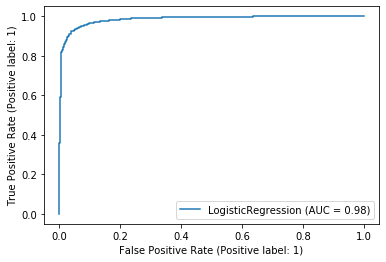

In [40]:
import matplotlib.pyplot as plt  
from sklearn import metrics
metrics.plot_roc_curve(lr_clf, test_features, test_labels)  
plt.show()  

In [23]:
from sklearn.linear_model import LinearRegression
linr_clf = LinearRegression()
linr_clf.fit(train_features, train_labels)
linr_clf.score(test_features, test_labels)

0.7890486480288836

In [24]:
from sklearn.linear_model import RidgeCV
RidgeCV_clf = RidgeCV()
RidgeCV_clf.fit(train_features, train_labels)
RidgeCV_clf.score(test_features, test_labels)

0.794673578733547

In [25]:
from sklearn.linear_model import BayesianRidge
BayesianRidge_clf = BayesianRidge()
BayesianRidge_clf.fit(train_features, train_labels)
BayesianRidge_clf.score(test_features, test_labels)

0.7971136567362817